# Numpy

Ce notebook résume les principales utilisations de numpy

In [1]:
import numpy as np

Créez à partir d’une liste un array unidimensionnel et vérifiez sa taille et ce qu’il comporte.


In [2]:
arr1=np.array([3,5,7])

In [3]:
# on peut ajouter le type
arr2=np.array([3,6,8,9],dtype=float)

In [4]:
# les sommes se font terme à terme
arr1+arr1

array([ 6, 10, 14])

In [5]:
# si on veut vérifier le type des données
arr1.dtype

dtype('int32')

In [6]:
# dans ce cas c'est le type str qui gagne
arr4=np.array([3,6,"r",9])

In [7]:
# on peut ajouter des données manquantes
arr5=np.array([3,np.nan,5],dtype=float)
arr5.dtype

dtype('float64')

In [8]:
# pour vérifier la forme, on utilise
arr5.shape

(3,)

Générez des arrays remplis de 0 et de 1 de taille 10.


In [9]:
arr_ones=np.ones(10)
arr_zeros=np.zeros(10)
np.concatenate([arr_ones,arr_zeros])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [10]:
# le broadcasting permet de faire des opérations entre des arrays de tailles différents
arr_id=np.eye(10)
arr_id+arr_ones

array([[2., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 2., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 2., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 2., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 2., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 2., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 2., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 2., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 2., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 2.]])

In [11]:
# on génère une image
arr_image=np.random.randint(0,255,size=(1000,1000,3))

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

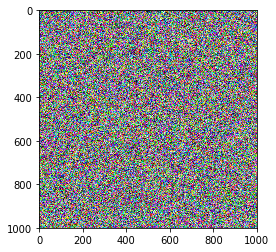

In [13]:
# on affiche l'image
plt.imshow(arr_image)

In [14]:
# on applique une transformation sur la couleur des pixels
arr_vec=np.array([2,3,2])
arr_image3=(arr_image/arr_vec).astype('uint8')

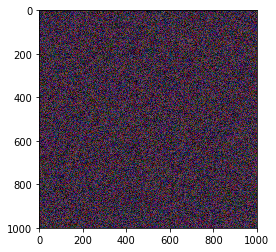

In [15]:
plt.imshow(arr_image3)

In [16]:
# on récupère une autre image
image_ny=plt.imread("../data/New York.jpg")

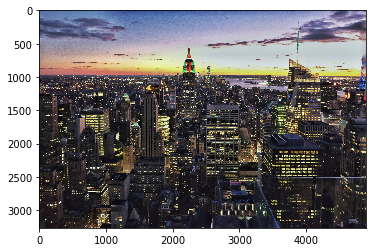

In [17]:
plt.imshow(image_ny)

In [18]:
print(type(image_ny),image_ny.shape)

<class 'numpy.ndarray'> (3264, 4896, 3)


### Extraire des éléments d'un array

In [19]:
arr6=np.array([2,4,5,6]).reshape(2,2)

In [20]:
arr6[0]

array([2, 4])

In [21]:
arr6[:,0]

array([2, 5])

In [22]:
arr6[0,0]

2

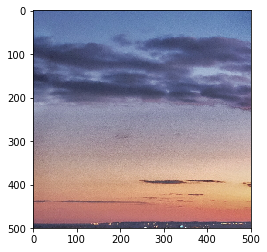

In [23]:
plt.imshow(image_ny[0:1000:2,0:1000:2,:])

In [24]:
# on peut prendre un puxel sur 2
image_ny[0:1000:2,0:1000:2,:].shape

(500, 500, 3)

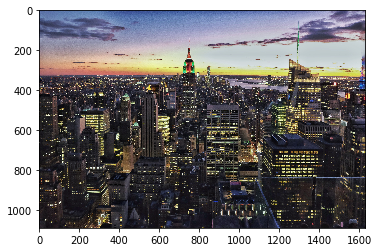

In [25]:
# on prend un pixel sur 3
plt.imshow(image_ny[::3,::3])

Construire une matrice rectangulaire de taille 3 x 2 avec une suite de nombres commençant à 5, calculer le produit de la transposée par la matrice.


In [26]:
arr_mat=np.arange(5,11).reshape(3,2)

In [27]:
np.dot(arr_mat.T,arr_mat)

array([[155, 176],
       [176, 200]])

In [28]:
np.dot(arr_mat.transpose(),arr_mat)

array([[155, 176],
       [176, 200]])

In [29]:
np.dot(np.transpose(arr_mat),arr_mat)

array([[155, 176],
       [176, 200]])

In [30]:
arr_mat.transpose().dot(arr_mat)

array([[155, 176],
       [176, 200]])

In [31]:
arr_mat.T.dot(arr_mat)

array([[155, 176],
       [176, 200]])

In [32]:
arr_mat

array([[ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [33]:
np.mean(arr_mat,axis=0)

array([7., 8.])

In [34]:
arr_mat.mean(axis=0)

array([7., 8.])

Générer un array de nombres aléatoires puis remplacer les valeurs plus petites que 0 par 0. Trier l’array obtenu


In [35]:
arr_rand=np.random.randn(10000)
arr_rand.mean()

0.008910069767994105

In [38]:
%timeit arr_pos=np.where(arr_rand>0,arr_rand,0)

58.5 µs ± 2.05 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [39]:
%%timeit
arr_pos=arr_rand.copy()
for i in range(arr_rand.size):
    if arr_rand[i]<0:
        arr_pos[i]=0

3.84 ms ± 234 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Calculer des statistiques sur les colonnes d'une matrice

In [40]:
arr_mat.mean(axis=0)

array([7., 8.])

Générer une matrice simple et sauvegarder cette matrice dans array.npy puis dans array.txt


In [41]:
arr_data=np.random.randn(10000000).reshape(1000000,10)

In [42]:
%time np.save("../data/arr_data.npy",arr_data)

Wall time: 203 ms


In [43]:
%time np.savetxt("../data/arr_data.txt",arr_data)

Wall time: 16.7 s


In [44]:
del arr_data

In [45]:
%time arr_data=np.load("../data/arr_data.npy")

Wall time: 62.5 ms


In [46]:
arr_data.shape

(1000000, 10)

In [47]:
del arr_data
%time arr_data=np.loadtxt("../data/arr_data.txt")

Wall time: 17.8 s


In [48]:
plt.imsave("../data/image.png",arr_image.astype("uint8"))